In [4]:
pip install folium


Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install --upgrade folium


Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install scipy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.8/24.8 MB 408.5 kB/s eta 0:00:0000:0100:02
Note: you may need to restart the kernel to use updated packages.


DATA MANAGEMENT AND VISUALIZATION 

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import folium
#from folium.plugins import HeatMan, MarkerCluster
from scipy import stats
#set plot style for better visualization
#plt.style.use('seaborn')
df = pd.read_csv('malaria_dataset2.csv')


In [11]:
print("======== Basic information about dataset=======")
df.head()
df.info()

======== Basic information about dataset=======
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Patient_ID         3000 non-null   int64  
 1   Date               3000 non-null   object 
 2   Age                3000 non-null   int64  
 3   Gender             3000 non-null   object 
 4   Temperature_F      2939 non-null   float64
 5   Parasitemia_count  3000 non-null   int64  
 6   Days_hospitalized  3000 non-null   int64  
 7   Latitude           3000 non-null   float64
 8   Longitude          3000 non-null   float64
dtypes: float64(3), int64(4), object(2)
memory usage: 211.1+ KB


STEP2 CHECK FOR MISSING VALUES

In [12]:
missing_values= df.isnull().sum()
missing_values

Patient_ID            0
Date                  0
Age                   0
Gender                0
Temperature_F        61
Parasitemia_count     0
Days_hospitalized     0
Latitude              0
Longitude             0
dtype: int64

In [13]:
#dropping method for missing values
numerical_columns=df.select_dtypes(include=['float64','int64']).columns
df[numerical_columns]=df[numerical_columns].fillna(df[numerical_columns].mean())

df.isnull().sum()
#df.info()

Patient_ID           0
Date                 0
Age                  0
Gender               0
Temperature_F        0
Parasitemia_count    0
Days_hospitalized    0
Latitude             0
Longitude            0
dtype: int64

In [ ]:
#df.dropna()

#Step 3 basic data preprocessing

In [14]:
# Step 3: Basic Data Preprocessing
# Convert dates and create age groups
import pandas as pd 
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

In [15]:
# Create age groups for easier analysis
df['Age_Group'] = pd.cut(df['Age'], 
                        bins=[0, 20, 30, 40, 50, 60, 100],
                        labels=['0-20', '21-30', '31-40', '41-50', '51-60', '60+'])

In [16]:
# Step 4: Create Basic Visualizations
def plot_demographic_analysis():
    """Create plots for age and gender distribution"""
    plt.figure(figsize=(12, 5))
    
    # Plot 1: Age Distribution
    plt.subplot(1, 2, 1)
    sns.histplot(data=df, x='Age')
    plt.title('Age Distribution')
    plt.xlabel('Age')
    plt.ylabel('Number of Patients')
    
    # Plot 2: Gender Distribution
    plt.subplot(1, 2, 2)
    df['Gender'].value_counts().plot(kind='pie', autopct='%1.1f%%')
    plt.title('Gender Distribution')
    
    plt.tight_layout()
    plt.show()

In [17]:
# Step 5: Analyze Clinical Data
def plot_clinical_analysis():
    """Create plots for temperature and hospitalization duration"""
    plt.figure(figsize=(12, 5))
    
    # Plot 1: Temperature Distribution
    plt.subplot(1, 2, 1)
    sns.histplot(data=df, x='Temperature_F', bins=30)
    plt.title('Patient Temperature Distribution')
    plt.xlabel('Temperature (°F)')
    plt.ylabel('Number of Patients')
    
    # Plot 2: Hospital Stay Duration
    plt.subplot(1, 2, 2)
    sns.histplot(data=df, x='Days_hospitalized', bins=20)
    plt.title('Hospital Stay Duration')
    plt.xlabel('Days in Hospital')
    plt.ylabel('Number of Patients')
    
    plt.tight_layout()
    plt.show()

In [18]:
# Step 6: Correlation Analysis
def plot_correlation_matrix():
    """Create a correlation heatmap for numerical variables"""
    # Select numerical columns
    numerical_cols = ['Age', 'Temperature_F', 'Parasitemia_count', 'Days_hospitalized']
    correlation_matrix = df[numerical_cols].corr()
    
    # Create heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
    plt.title('Correlation Between Variables')
    plt.show()

In [21]:
# Step 7: Geographic Visualization
from folium.plugins import MarkerCluster  # Add this import
import folium

def create_map():
    # Create a base map
    base_map = folium.Map(
        location=[df['Latitude'].iloc[0], df['Longitude'].iloc[0]],
        zoom_start=6
    )

    # Add marker cluster
    marker_cluster = MarkerCluster().add_to(base_map)

    # Add markers for each case
    for idx, row in df.iterrows():
        folium.Marker(
            location=[row['Latitude'], row['Longitude']],
            popup=f"Info: {row['Info']}"
        ).add_to(marker_cluster)

    # Save or display the map
    base_map.save("map.html")
    print("Map has been saved as 'map.html'.")


1. Demographic Analysis


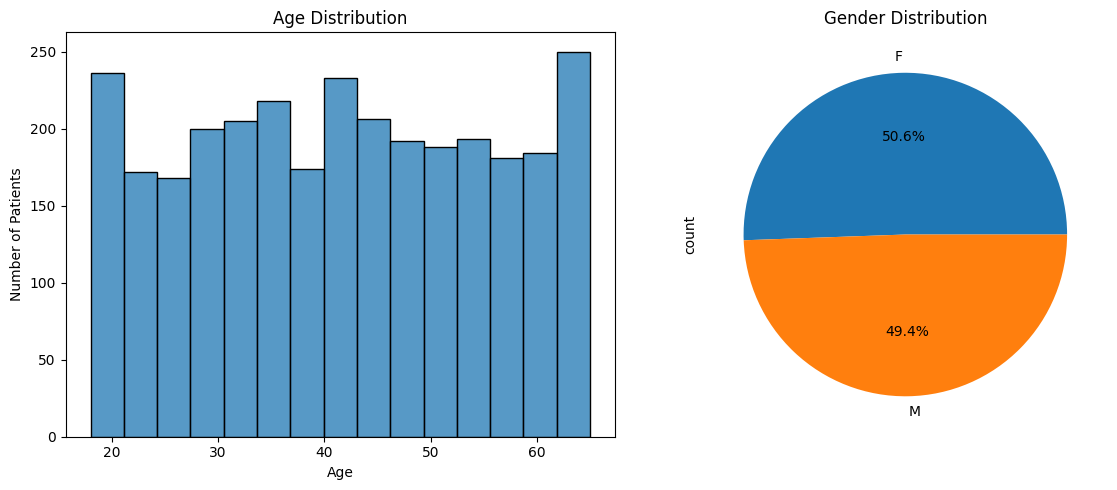


2. Clinical Analysis


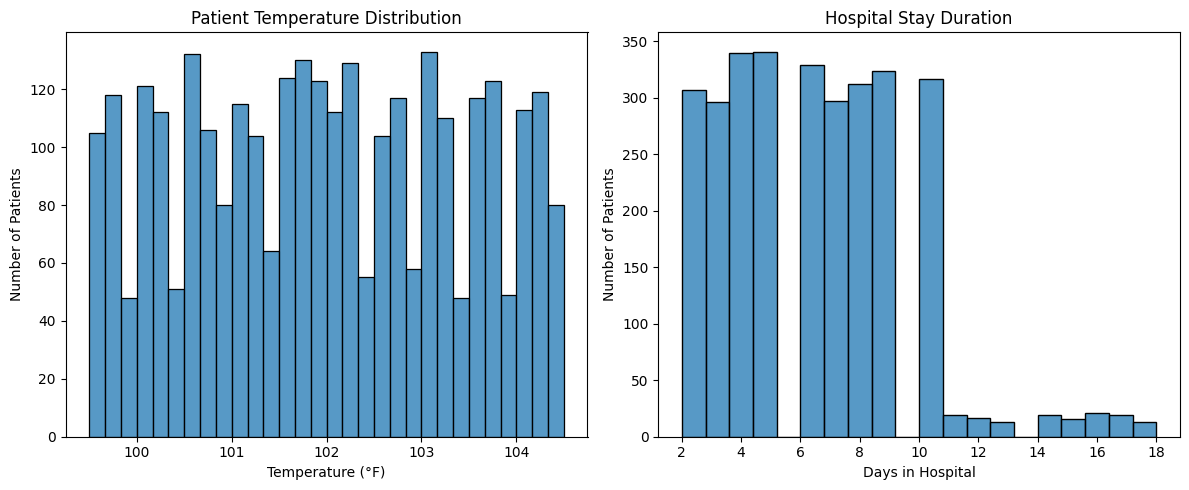


3. Correlation Analysis


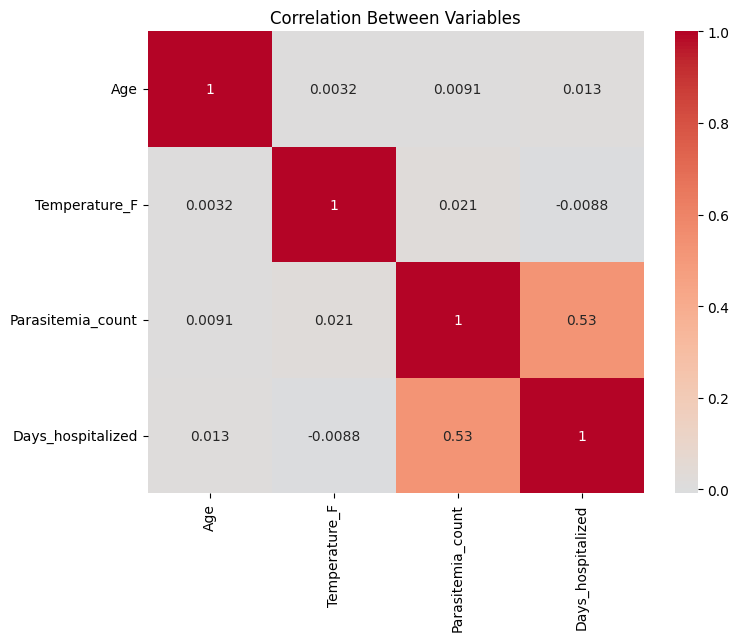


4. Creating Geographic Visualization


KeyError: 'Info'

In [26]:
# Step 9: Run all analyses
def run_analysis():
    """Run all analysis functions"""
    print("\n1. Demographic Analysis")
    plot_demographic_analysis()
    
    print("\n2. Clinical Analysis")
    plot_clinical_analysis()
    
    print("\n3. Correlation Analysis")
    plot_correlation_matrix()
    
    print("\n4. Creating Geographic Visualization")
    create_map()
    
    print("\n5. Disease Severity Analysis")
    calculate_severity()

# Run the analysis
if __name__ == "__main__":
    run_analysis()